In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime
import pytz
import plotly as pt
import plotly.graph_objects as go
from plotly.offline import iplot
from scipy import signal
import os, os.path


In [2]:

pd.options.mode.chained_assignment = None  # default='warn'

In [26]:
para_labels = ["Langeoog","Spiekeroog","WangeroogeNord","WangeroogeWest"]
data_path = '../../../Data/2022_10_20_sealevels/'



for i in range(4):
    
    files = os.listdir(data_path+para_labels[i])
    file_count = len(files)
    
    locals()[para_labels[i]+'_first'] = pd.DataFrame()
    
    for j in range(file_count): 
    
        locals()[para_labels[i]+'_'+str(j)] = Langeoog = pd.read_csv(data_path+para_labels[i]+'/'+files[j], 
                                                                sep=";", header=None, skiprows=1)

        locals()[para_labels[i]+'_'+str(j)]['Date_Time'] = None
        
        locals()[para_labels[i]+'_'+str(j)]['Date_Time'].iloc[:-1] = pd.to_datetime(files[j][:10].replace('_','/')+
                                                                               ' '+ locals()[para_labels[i]+'_'+str(j)][0][:-1],
                       utc = pytz.timezone("Europe/Berlin"))
        
        locals()[para_labels[i]+'_'+str(j)]['Date_Time'].iloc[-1] = locals()[para_labels[i]+'_'+str(j)]['Date_Time'].iloc[-2]+datetime.timedelta(0,60)
        
        locals()[para_labels[i]+'_'+str(j)].rename(columns={1:"W_cm"}, inplace=True)
        
        locals()[para_labels[i]+'_first'] = pd.concat([locals()[para_labels[i]+'_first'], locals()[para_labels[i]+'_'+str(j)]])

        locals()[para_labels[i]+'_first'].drop(columns=0, inplace=True)
        
    locals()[para_labels[i]+'_first'].replace('XXX,XXX',np.NaN, inplace=True)


data_path = '../../../Data/2023_03_28_sealevels/'
directory_labels = ["Langeoog-W1.zrx","Spiekeroog-W1.zrx", "Wangerooge-Nord-W1.zrx", "Wangerooge-West-W1.zrx"]


for i in range(4):
    
    locals()[para_labels[i]+'_all'] = pd.DataFrame()
    
    locals()[para_labels[i]] = pd.read_csv(data_path+directory_labels[i], skiprows=6, 
                                                      sep="\s+", parse_dates=[0], header=None)
    locals()[para_labels[i]][0] = pd.to_datetime(locals()[para_labels[i]][0], 
                                                           utc = pytz.timezone("Europe/Berlin"))
    locals()[para_labels[i]].rename(columns={0:"Date_Time", 1:"W_cm"}, inplace=True)
    
    locals()[para_labels[i]+'_all'] = pd.concat([locals()[para_labels[i]+'_first'], locals()[para_labels[i]]])
    
    locals()[para_labels[i]+'_all']['W_cm'] = pd.to_numeric(locals()[para_labels[i]+'_all']['W_cm'])
    
    locals()[para_labels[i]+'_all'].sort_values('Date_Time', inplace=True)
    
    locals()[para_labels[i]+'_all'].to_pickle(data_path+para_labels[i]+'.pkl')


(250.0, 700.0)

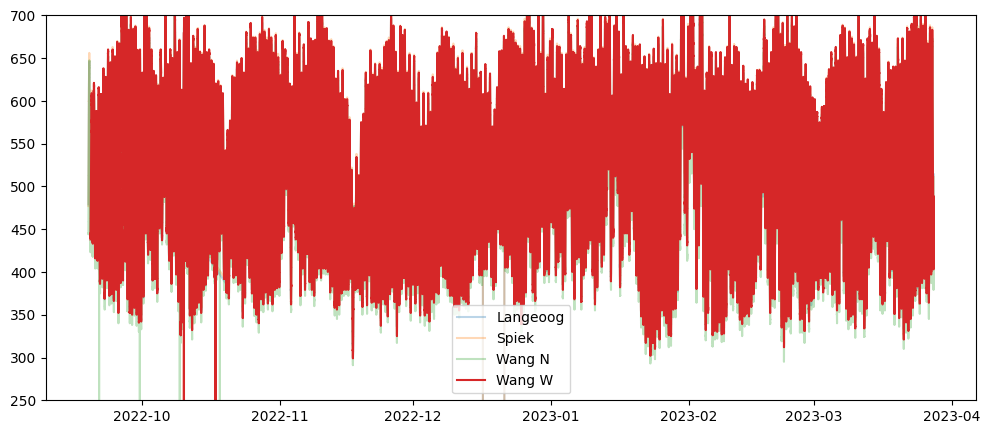

In [25]:

WangeroogeNord_all.sort_values('Date_Time', inplace=True)
WangeroogeWest_all.sort_values('Date_Time', inplace=True)


X = pd.to_numeric(WangeroogeNord_all['W_cm'])
Y = pd.to_numeric(WangeroogeWest_all["W_cm"])

WangeroogeNord_all.sort_values('Date_Time')

fig , ax = plt.subplots(1, figsize=(12,5))

ax.plot(Langeoog_all['Date_Time'], Langeoog_all['W_cm'], label="Langeoog", alpha=0.3)

ax.plot(Spiekeroog_all["Date_Time"], Spiekeroog_all['W_cm'], label="Spiek", alpha=0.3)

ax.plot(WangeroogeNord_all["Date_Time"], X, label="Wang N", alpha=0.3)

ax.plot(WangeroogeWest_all["Date_Time"], Y, label="Wang W")


ax.legend()

ax.set_ylim(250,700)

In [13]:
WangeroogeNord_all['W_cm'].isnumeric

AttributeError: 'Series' object has no attribute 'isnumeric'

In [28]:
Spiekeroog_all.

W_cm
count  300950.000000
mean      495.203595
std       217.668867
min      -777.000000
25%       437.000000
50%       525.000000
75%       604.000000
max       750.000000

In [43]:
sum(WangeroogeWest_all['Date_Time'].diff()[1:] == datetime.timedelta(seconds=60))

273599